## Feature Selection - Correlation Analysis, Multicollinearity

### Feature Selection

In [1]:
pwd

'C:\\Users\\1780742\\Desktop\\Tasks_Venky'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv("car_mileage.csv")
data.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

### Correlation Analysis - Matrix with Heatmap

In [4]:
corrmat = data.corr()
  
corrmat

mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  0.599832  0.480285 -0.550925  
cyl  -0.810812 -0.522607 -0.492687  0.526988  
disp -0.710416 -0.591227 -0.555569  0.394977  
hp   -0.723097 -0.243204 -0.125704  0.749812  
drat  0.440278  0.712711  0.699610 -0.090790  
wt   -0.554916 -0.692495 -0.583287  0.427606  
qsec  0.744535 -0.229861 -0.212682 -0.656249  
vs    1.000000  0.168345  0.206023 -0.569607  
am    0.168345  1.000000  0.794059  0.057534  
gear  0.206023  0.794059  1.000000  0.274073  
carb -0.569607  0.057534  0.274073  1.000000

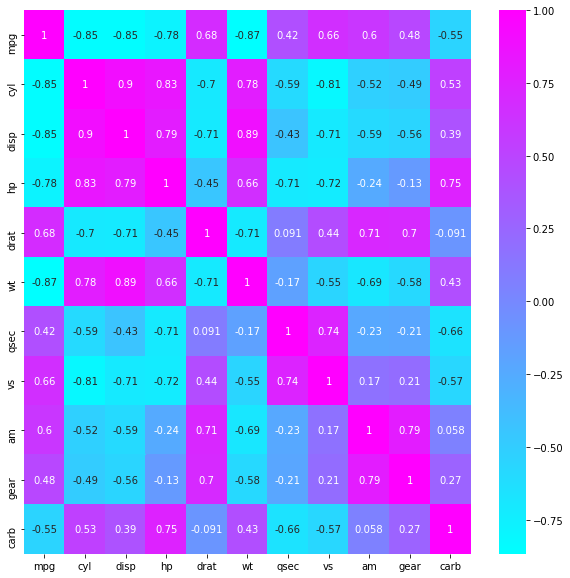

In [5]:
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="cool")

## Multicollinearity:
#### Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.
### Detecting Multicollinearity using VIF:
#### VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
data = pd.read_csv('car_mileage.csv', header=0)
X = data[['disp','hp','drat','wt','qsec']]

### VIF dataframe

In [8]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

### Calculating VIF for each feature

In [9]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

In [10]:
vif_data

feature         VIF
0    disp   37.458285
1      hp   22.106270
2    drat   65.461593
3      wt   81.888081
4    qsec  105.676308